# PCA

In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
# Data Generation Code
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)


In [7]:
genes = ['gene' + str(i) for i in range(1,101)]
genes

['gene1',
 'gene2',
 'gene3',
 'gene4',
 'gene5',
 'gene6',
 'gene7',
 'gene8',
 'gene9',
 'gene10',
 'gene11',
 'gene12',
 'gene13',
 'gene14',
 'gene15',
 'gene16',
 'gene17',
 'gene18',
 'gene19',
 'gene20',
 'gene21',
 'gene22',
 'gene23',
 'gene24',
 'gene25',
 'gene26',
 'gene27',
 'gene28',
 'gene29',
 'gene30',
 'gene31',
 'gene32',
 'gene33',
 'gene34',
 'gene35',
 'gene36',
 'gene37',
 'gene38',
 'gene39',
 'gene40',
 'gene41',
 'gene42',
 'gene43',
 'gene44',
 'gene45',
 'gene46',
 'gene47',
 'gene48',
 'gene49',
 'gene50',
 'gene51',
 'gene52',
 'gene53',
 'gene54',
 'gene55',
 'gene56',
 'gene57',
 'gene58',
 'gene59',
 'gene60',
 'gene61',
 'gene62',
 'gene63',
 'gene64',
 'gene65',
 'gene66',
 'gene67',
 'gene68',
 'gene69',
 'gene70',
 'gene71',
 'gene72',
 'gene73',
 'gene74',
 'gene75',
 'gene76',
 'gene77',
 'gene78',
 'gene79',
 'gene80',
 'gene81',
 'gene82',
 'gene83',
 'gene84',
 'gene85',
 'gene86',
 'gene87',
 'gene88',
 'gene89',
 'gene90',
 'gene91',
 'gene92

In [8]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [9]:
wt

['wt1', 'wt2', 'wt3', 'wt4', 'wt5']

In [10]:
ko

['ko1', 'ko2', 'ko3', 'ko4', 'ko5']

In [13]:
dataset = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [15]:
dataset

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for gene in dataset.index:
    dataset.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    dataset.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [21]:
dataset

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,170,153,156,146,158,418,361,340,362,353
gene2,752,762,735,789,753,850,907,868,897,885
gene3,532,503,518,511,527,194,188,198,214,197
gene4,16,25,23,22,16,886,887,910,965,903
gene5,178,201,161,160,180,696,652,672,646,642
...,...,...,...,...,...,...,...,...,...,...
gene96,890,897,870,872,915,739,874,770,769,769
gene97,569,569,605,564,576,35,25,24,18,26
gene98,954,946,913,956,986,895,934,940,881,890
gene99,221,233,230,236,239,993,1011,917,1025,999


In [22]:
dataset.shape

(100, 10)

In [23]:
# First center and scale the data, we use samples as columns in the dataset that's why we are using transpose  
scaled_data = preprocessing.scale(dataset.T)

In [24]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math

PCA()

In [25]:
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

In [26]:
pca_data

array([[ 9.56855235e+00, -1.54095717e+00,  9.21370431e-01,
        -7.17059246e-02, -5.69957289e-01,  1.55984157e+00,
         1.33918719e+00, -8.49278952e-01, -1.71234821e-02,
         1.70346461e-15],
       [ 9.09668963e+00,  3.63804422e+00,  4.38745491e-01,
         1.52622313e+00, -8.81896961e-01, -8.52439967e-01,
         5.09647702e-01, -7.63338973e-02,  1.98925619e-01,
         9.14650720e-16],
       [ 9.09698399e+00, -7.64043242e-01,  2.84411190e+00,
         6.03611254e-02,  1.80418847e+00, -3.10211337e-01,
        -9.82227170e-01,  4.05684679e-01, -1.77477491e-01,
         7.07180074e-16],
       [ 9.67601448e+00, -6.09119918e-01, -1.88938230e+00,
        -1.26837626e+00,  3.58730175e-01, -1.14507259e-01,
         4.29361776e-01,  1.34110157e+00,  7.75547018e-01,
         1.27994494e-15],
       [ 9.83079719e+00, -5.91849463e-01, -2.19209946e+00,
        -2.61907810e-01, -6.43227375e-01, -3.18788229e-01,
        -1.27422498e+00, -8.26574603e-01, -7.82947185e-01,
         9.

In [48]:
pca.components_[0]

array([-0.10392881, -0.10069495,  0.10553863, -0.10562038, -0.10542351,
        0.1051582 , -0.10534749, -0.05219258,  0.10552805, -0.10459114,
       -0.10378549,  0.09102361,  0.10507508, -0.10537605, -0.10430563,
        0.10522718,  0.10554192, -0.10500895, -0.10519459, -0.10465483,
       -0.1043246 ,  0.10189057,  0.10520441,  0.09005784, -0.10551653,
        0.10460532,  0.10183363, -0.10499257, -0.10312037,  0.10532515,
        0.10470968, -0.08944337, -0.10264932, -0.10557666, -0.10493901,
       -0.10313325,  0.1054339 ,  0.01070466, -0.09246214,  0.10546853,
       -0.10523631, -0.09078519, -0.09937375,  0.10438777,  0.10548474,
       -0.09953399, -0.10502446,  0.10443453,  0.10503638, -0.10514796,
        0.10558953,  0.10518789, -0.10557859,  0.06578356,  0.10160776,
        0.10377679, -0.10550041, -0.1048651 ,  0.10563943,  0.09247579,
        0.10174798,  0.10220389, -0.08777847,  0.10139291, -0.10519932,
        0.10477048,  0.09744526, -0.10394803, -0.10538233,  0.08

In [30]:
pca.explained_variance_ratio_

array([8.94419363e-01, 2.80145368e-02, 2.07352459e-02, 1.59496776e-02,
       1.52327243e-02, 8.94402238e-03, 7.16956066e-03, 5.63371819e-03,
       3.90115094e-03, 1.96598364e-33])

In [31]:
pca.explained_variance_

array([9.93799293e+01, 3.11272631e+00, 2.30391621e+00, 1.77218640e+00,
       1.69252492e+00, 9.93780264e-01, 7.96617851e-01, 6.25968687e-01,
       4.33461215e-01, 2.18442627e-31])

In [32]:
pca.mean_

array([ 7.77156117e-17,  7.32747196e-16,  1.33226763e-16, -4.44089210e-17,
       -5.55111512e-17,  6.66133815e-17,  9.99200722e-17,  1.11022302e-17,
        8.88178420e-17,  1.33226763e-16, -1.22124533e-16,  0.00000000e+00,
        3.33066907e-17,  4.44089210e-17,  1.55431223e-16,  8.88178420e-17,
        0.00000000e+00,  1.99840144e-16,  1.11022302e-17,  6.66133815e-17,
        0.00000000e+00, -3.33066907e-17,  8.88178420e-17, -5.55111512e-18,
        7.77156117e-17, -1.11022302e-16,  4.44089210e-16, -2.33146835e-16,
       -5.99520433e-16,  0.00000000e+00,  1.99840144e-16, -6.43929354e-16,
       -5.44009282e-16, -6.66133815e-17,  1.66533454e-16, -1.33226763e-16,
       -1.33226763e-16, -2.06223927e-15,  1.19904087e-15,  8.88178420e-17,
       -1.77635684e-16,  0.00000000e+00,  1.55431223e-15, -1.88737914e-16,
        8.88178420e-17, -2.66453526e-16,  0.00000000e+00,  1.77635684e-16,
        7.77156117e-17,  1.22124533e-16, -3.33066907e-17, -1.11022302e-16,
        1.33226763e-16, -

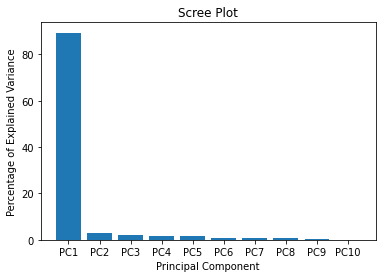

In [33]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [34]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

In [35]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.568552,-1.540957,0.921370,-0.071706,-0.569957,1.559842,1.339187,-0.849279,-0.017123,1.703465e-15
wt2,9.096690,3.638044,0.438745,1.526223,-0.881897,-0.852440,0.509648,-0.076334,0.198926,9.146507e-16
wt3,9.096984,-0.764043,2.844112,0.060361,1.804188,-0.310211,-0.982227,0.405685,-0.177477,7.071801e-16
wt4,9.676014,-0.609120,-1.889382,-1.268376,0.358730,-0.114507,0.429362,1.341102,0.775547,1.279945e-15
wt5,9.830797,-0.591849,-2.192099,-0.261908,-0.643227,-0.318788,-1.274225,-0.826575,-0.782947,9.401863e-16
ko1,-9.522983,2.510809,-0.124350,-0.752518,0.154569,1.863156,-0.514275,0.550789,-0.471142,-8.553640e-16
ko2,-9.162796,-1.933390,-0.711459,2.755871,-0.089556,-0.035860,0.289145,0.778809,-0.450928,-8.570240e-16
ko3,-9.272977,-0.673479,0.423011,0.281224,-1.025784,0.155238,-1.075181,-0.570671,1.373059,-1.048696e-15
ko4,-9.578223,-0.567173,1.260182,-1.882715,-1.657077,-1.275096,0.534017,0.231834,-0.543639,-1.223477e-15
ko5,-9.732058,0.531158,-0.970130,-0.386457,2.550011,-0.671333,0.744549,-0.985360,0.095725,-5.797676e-16


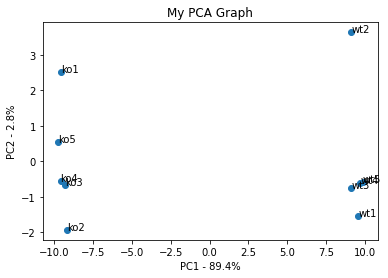

In [36]:
#the following code makes a fancy looking plot using PC1 and PC2
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [ ]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores

In [46]:
loading_scores = pd.Series(pca.components_[0], index=genes)

In [47]:
loading_scores

gene1     -0.103929
gene2     -0.100695
gene3      0.105539
gene4     -0.105620
gene5     -0.105424
             ...   
gene96     0.088703
gene97     0.105565
gene98     0.072739
gene99    -0.105465
gene100    0.105501
Length: 100, dtype: float64

In [49]:
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [50]:
sorted_loading_scores

gene79    0.105641
gene59    0.105639
gene4     0.105620
gene89    0.105608
gene51    0.105590
            ...   
gene87    0.061022
gene8     0.052193
gene80    0.040019
gene88    0.023429
gene38    0.010705
Length: 100, dtype: float64

In [51]:
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene79    0.105641
gene59    0.105639
gene4    -0.105620
gene89   -0.105608
gene51    0.105590
gene53   -0.105579
gene34   -0.105577
gene97    0.105565
gene77   -0.105561
gene17    0.105542
dtype: float64
